<h1> Stock Market Prediction And Forecasting Using Stacked LSTM </h1>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data_close = dataset_train['Close']

In [5]:
data_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

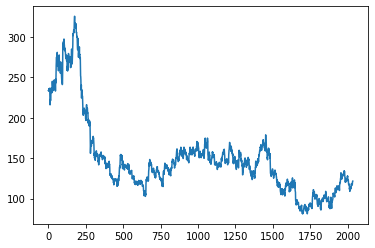

In [6]:
plt.plot(data_close)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [9]:
data_close.shape

(2035, 1)

In [10]:
print(data_close)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [11]:
training_size = int(len(data_close) * 0.75)
test_size = len(data_close) - training_size
train_data, test_data = data_close[0:training_size,:], data_close[training_size:len(data_close),:1]

In [12]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [14]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [17]:
#Create the LSTM Model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 11s 284ms/step - loss: 0.0177 - val_loss: 0.0058
Epoch 2/100
23/23 [==============================] - 6s 256ms/step - loss: 0.0023 - val_loss: 7.3177e-04
Epoch 3/100
23/23 [==============================] - 6s 248ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 4/100
23/23 [==============================] - 8s 337ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/100
23/23 [==============================] - 7s 286ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 6/100
23/23 [==============================] - 7s 298ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/100
23/23 [==============================] - 7s 287ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
23/23 [==============================] - 7s 291ms/step - loss: 0.0011 - val_loss: 8.9600e-04
Epoch 9/100
23/23 [==============================] - 7s 302ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 10/100
23/23 [==============================] - 7s 301ms/step - loss: 9.9084

23/23 [==============================] - 7s 284ms/step - loss: 2.5215e-04 - val_loss: 2.1258e-04
Epoch 77/100
23/23 [==============================] - 7s 299ms/step - loss: 2.5554e-04 - val_loss: 1.7344e-04
Epoch 78/100
23/23 [==============================] - 7s 287ms/step - loss: 2.5815e-04 - val_loss: 1.7458e-04
Epoch 79/100
23/23 [==============================] - 7s 293ms/step - loss: 2.4789e-04 - val_loss: 2.9843e-04
Epoch 80/100
23/23 [==============================] - 6s 282ms/step - loss: 2.7485e-04 - val_loss: 1.8309e-04
Epoch 81/100
23/23 [==============================] - 7s 293ms/step - loss: 2.2088e-04 - val_loss: 2.1089e-04
Epoch 82/100
23/23 [==============================] - 7s 312ms/step - loss: 2.2630e-04 - val_loss: 1.8025e-04
Epoch 83/100
23/23 [==============================] - 8s 355ms/step - loss: 2.4138e-04 - val_loss: 1.6072e-04
Epoch 84/100
23/23 [==============================] - 7s 307ms/step - loss: 2.6149e-04 - val_loss: 1.5779e-04
Epoch 85/100
23/23 [===

In [21]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [22]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [23]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

163.66380440444263

In [24]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

105.08294273979378

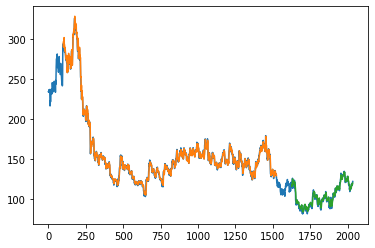

In [25]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(data_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [26]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [27]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [28]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [29]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16554517]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

8 day output [[0.16880825]]
9 day input [0.12867647 0.11846405 0.14644608 0.14808007 0.15910948 0.15992647
 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908
 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556
 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.

18 day output [[0.17213508]]
19 day input [0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353
 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405
 0.1621732  0.16319444 0.16584967 0.16554517 0.16691019 0.16747993
 0.16779923 0.1680172

29 day output [[0.17632587]]
[[0.16554516553878784], [0.16691018640995026], [0.16747993230819702], [0.1677992343902588], [0.16801723837852478], [0.16819548606872559], [0.1683734953403473], [0.16857464611530304], [0.168808251619339], [0.16907444596290588], [0.1693682223558426], [0.16968309879302979], [0.17001283168792725], [0.17035268247127533], [0.1706993728876114], [0.17105133831501007], [0.17140793800354004], [0.17176909744739532], [0.17213508486747742], [0.17250590026378632], [0.17288143932819366], [0.17326118052005768], [0.17364422976970673], [0.17402957379817963], [0.17441605031490326], [0.17480245232582092], [0.1751876026391983], [0.17557048797607422], [0.17595016956329346], [0.17632587254047394]]


In [30]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [31]:
df3 = data_close.tolist()
df3.extend(lst_output)

In [32]:
len(data_close)

2035

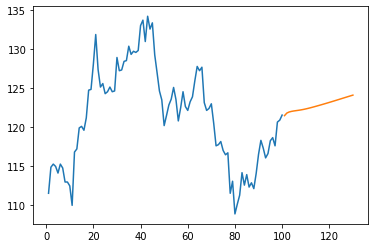

In [33]:
plt.plot(day_new, scaler.inverse_transform(data_close[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))